In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

* Load data

In [3]:
df=pd.read_csv('weight-height.csv')

* Data Preprocessing

In [4]:
# check weather if there is any 
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [5]:
# checking the datatypes of the data in columns
df.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

In [6]:
# here height is in inches and weight is in pounds we will convert height to meter and weight to kg
df["Height"]=df['Height']*0.0254
df['Weight']=df['Weight']* 0.45359237
df


,Gender,Height,Weight
0,Male,1.875714,109.721075
1,Male,1.747060,73.622792
2,Male,1.882397,96.497629
3,Male,1.821967,99.809586
4,Male,1.774998,93.598695
...,...,...,...
9995,Female,1.680785,62.041210
9996,Female,1.703506,77.504378
9997,Female,1.622247,58.275424
9998,Female,1.753470,74.322226


In [7]:
df.head()

,Gender,Height,Weight
0,Male,1.875714,109.721075
1,Male,1.747060,73.622792
2,Male,1.882397,96.497629
3,Male,1.821967,99.809586
4,Male,1.774998,93.598695


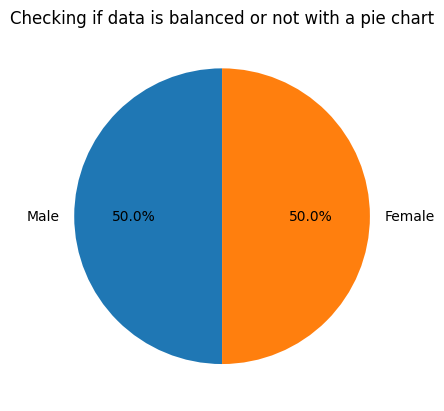

In [8]:
#Checking if data is balanced or not using pie chart for our target variable - gender
#If the percentages are roughly equal, then you can assume that the data is balanced. However, if there is a significant difference between the percentages, then you may need to take additional steps to balance the data, such as oversampling or undersampling.
labels = df.Gender.unique()
sizes = [(df.Gender == labels[0]).sum(), (df.Gender == labels[1]).sum()]
plt.pie(sizes, labels = labels, autopct='%1.1f%%', startangle = 90)
plt.title("Checking if data is balanced or not with a pie chart")
plt.show()

In [9]:
f_df=df[df['Gender']=='Female']
m_df=df[df['Gender']=='Male']

In [10]:
f_df

,Gender,Height,Weight
5000,Female,1.496333,46.306486
5001,Female,1.656842,64.095243
5002,Female,1.609573,59.439380
5003,Female,1.637792,58.137620
5004,Female,1.569545,58.867856
...,...,...,...
9995,Female,1.680785,62.041210
9996,Female,1.703506,77.504378
9997,Female,1.622247,58.275424
9998,Female,1.753470,74.322226


In [11]:
f_df.describe()

,Height,Weight
count,5000.000000,5000.000000
mean,1.618203,61.625102
std,0.068486,8.628446
min,1.378284,29.347484
25%,1.572119,55.761968
50%,1.618765,61.741897
75%,1.665315,67.499501
max,1.864095,91.733257


In [12]:
m_df

,Gender,Height,Weight
0,Male,1.875714,109.721075
1,Male,1.747060,73.622792
2,Male,1.882397,96.497629
3,Male,1.821967,99.809586
4,Male,1.774998,93.598695
...,...,...,...
4995,Male,1.749046,80.345294
4996,Male,1.751925,72.250564
4997,Male,1.702150,90.353514
4998,Male,1.817566,84.325502


In [13]:
m_df.describe()

,Height,Weight
count,5000.000000,5000.000000
mean,1.753269,84.831127
std,0.072729,8.972581
min,1.483535,51.211912
25%,1.706237,78.874164
50%,1.753304,84.836989
75%,1.803114,90.880770
max,2.006568,122.465267


# Correlation of height and weight for females 

In [14]:
corr_f=f_df['Height'].corr(f_df['Weight'],method='pearson')
corr_f

0.8496085914186007

In [15]:
# corr_f1=f_df['Height'].corr(f_df['Weight'],method='spearman')
# corr_f1

Text(0, 0.5, 'Weight (kg)')

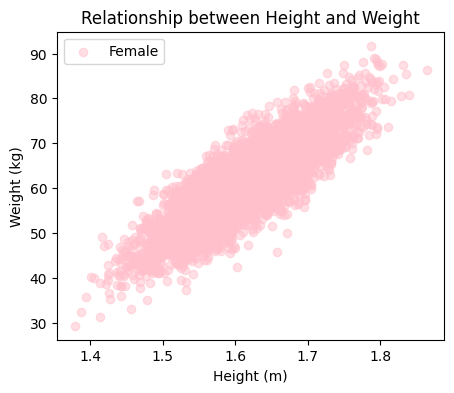

In [16]:
# Create a scatter plot for female data
fig, ax = plt.subplots(figsize=(5, 4))
plt.scatter(f_df['Height'],f_df['Weight'], color='pink', label='Female',alpha=.5)
plt.legend()
plt.title("relationship between height and ")
plt.title("Relationship between Height and Weight")
plt.xlabel("Height (m)")
plt.ylabel("Weight (kg)")

# Linear Regression

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [18]:
# split the data into training and testing sets
ht_train, ht_test, wt_train, wt_test = train_test_split(f_df['Height'], f_df['Weight'], test_size=0.3, random_state=42)

In [19]:
# extract the features (height) and target variable (weight) and convert them to 2d format
ht_train=ht_train.values.reshape(-1,1)
wt_train=wt_train.values.reshape(-1,1)
ht_test=ht_test.values.reshape(-1,1)
wt_test=wt_test.values.reshape(-1,1)

In [20]:
ht_train

array([[1.71936437],
       [1.65053007],
       [1.60802203],
       ...,
       [1.53453466],
       [1.61080131],
       [1.63348693]])

In [21]:
# create a linear regression model and fit it to the training data
lr_model = LinearRegression()
lr_model.fit(ht_train,wt_train)

LinearRegression()

In [22]:
# getting slope and intercept that will futher be used in obtaining regression eq
slope = lr_model.coef_[0]
intercept = lr_model.intercept_
print(slope,intercept)

[105.8548534] [-109.5940577]


In [23]:
# use the model to make predictions on the test data
wt_pred = lr_model.predict(ht_test)

In [24]:
wt_pred

array([[71.78866932],
       [42.95596077],
       [68.15398104],
       ...,
       [51.09124009],
       [64.9360489 ],
       [64.64044766]])

In [25]:
wt_test

array([[71.33133198],
       [41.55152738],
       [74.70709375],
       ...,
       [47.69637944],
       [68.71552993],
       [72.51905175]])

* here mse is common metric used to evaluate the performance of a regression model. It measures the average squared difference between the predicted and actual values in the test set.

In [26]:
# evaluate the model's performance using mean squared error
mse=mean_squared_error(wt_test,wt_pred)
mse

21.031367538879614

In [27]:
from sklearn.metrics import r2_score

* An R-squared value of 0.73 indicates that around 73% of the variation in the target variable (in this case, the height of females) is explained by the independent variable (in this case, the weight of females). This indicates a moderate to strong correlation between the two variables.





In [28]:
r2=r2_score(wt_test,wt_pred)
r2

0.7301914495397979

Text(0, 0.5, 'Weight (kg)')

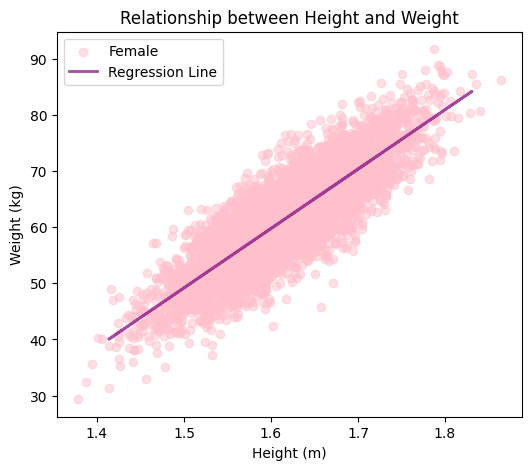

In [29]:
# Create a scatter plot for female data
fig, ax = plt.subplots(figsize=(6, 5))
plt.scatter(f_df['Height'],f_df['Weight'], color='pink', label='Female' ,alpha=0.5)

plt.plot(ht_test,wt_pred,color='purple',linewidth=2, label='Regression Line',alpha=.7)

plt.legend()
plt.title("Relationship between Height and Weight")
plt.xlabel("Height (m)")
plt.ylabel("Weight (kg)")

In [30]:

print("Equation of the regression line: y = {:.2f}x + {:.2f}".format(slope.tolist()[0], intercept.tolist()[0]))


Equation of the regression line: y = 105.85x + -109.59


* with help of this function you can provide height slope and intercept and will obtain ideal predicted weight for females

In [31]:
def predict_weight(height, slope, intercept):
    weight = slope * height + intercept
    return weight

In [32]:
height = 1.80 # meters
weight = predict_weight(height, slope, intercept)
print(weight)

[80.94467842]


# Correlation of height and weight for males

In [33]:
corr_m=m_df['Height'].corr(m_df['Weight'],method='pearson')

In [34]:
corr_m

0.8629788486163176

Text(0, 0.5, 'Weight (kg)')

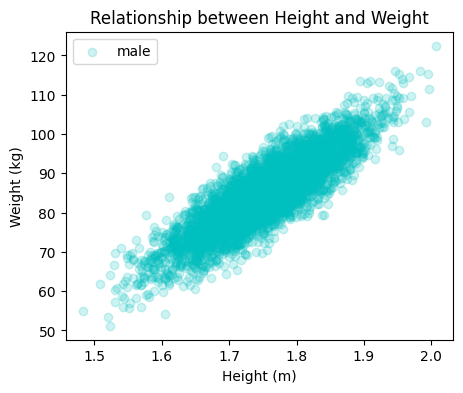

In [35]:
# Create a scatter plot for female data
fig, ax = plt.subplots(figsize=(5, 4))
plt.scatter(m_df['Height'],m_df['Weight'], color='c', label='male',alpha=.2)
plt.legend()

plt.title("Relationship between Height and Weight")
plt.xlabel("Height (m)")
plt.ylabel("Weight (kg)")

# Linear Regression

In [36]:
# split the data into training and testing sets
ht_train1, ht_test1, wt_train1, wt_test1 = train_test_split(m_df['Height'], m_df['Weight'], test_size=0.3, random_state=42)

In [37]:
ht_train1=ht_train1.values.reshape(-1,1)
ht_test1=ht_test1.values.reshape(-1,1)
wt_train1=wt_train1.values.reshape(-1,1)
wt_test1=wt_test1.values.reshape(-1,1)

In [38]:
# create a linear regression model and fit it to the training data
lr_model1 = LinearRegression()
lr_model1.fit(ht_train1,wt_train1)

LinearRegression()

In [39]:
slope1 = lr_model1.coef_[0]
intercept1 = lr_model1.intercept_
print(slope1,intercept1)

[106.3287173] [-101.60233443]


In [40]:
# use the model to make predictions on the test data
wt_pred1 = lr_model1.predict(ht_test1)

In [41]:
wt_pred1

array([[92.77202202],
       [85.10057623],
       [81.76444393],
       ...,
       [92.57356715],
       [99.17193345],
       [86.86002726]])

In [42]:
wt_test1

array([[95.954193  ],
       [81.19590704],
       [80.8198629 ],
       ...,
       [98.00001568],
       [94.90853944],
       [85.30748048]])

In [43]:
# evaluate the model's performance using mean squared error
mse=mean_squared_error(wt_test1,wt_pred1)
mse

19.65562370769601

In [44]:
r2=r2_score(wt_test,wt_pred)
r2

0.7301914495397979

Text(0, 0.5, 'Weight (kg)')

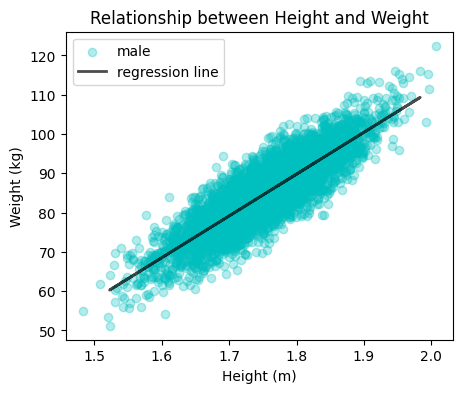

In [45]:
# Create a scatter plot for female data
fig, ax = plt.subplots(figsize=(5, 4))
plt.scatter(m_df['Height'],m_df['Weight'], color='c', label='male',alpha=.3)

plt.plot(ht_test1,wt_pred1,color='black',linewidth=2,label='regression line',alpha=.7)

plt.legend()
plt.title("Relationship between Height and Weight")
plt.xlabel("Height (m)")
plt.ylabel("Weight (kg)")

In [46]:

print("Equation of the regression line for males: y = {:.2f}x + {:.2f}".format(slope1.tolist()[0], intercept1.tolist()[0]))

Equation of the regression line for males: y = 106.33x + -101.60


* with help of this function you can provide height slope and intercept and will obtain ideal predicted weight for males

In [47]:
def predict_weight(height, slope, intercept):
    weight = slope * height + intercept
    return weight

In [48]:
height = 1.80 # meters
weight = predict_weight(height, slope1, intercept1)
print(weight)

[89.78935671]


Text(0, 0.5, 'Weight (kg)')

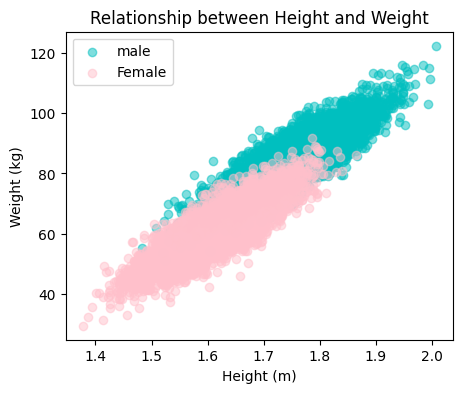

In [49]:
# Create a scatter plot for female data
fig, ax = plt.subplots(figsize=(5, 4))
plt.scatter(m_df['Height'],m_df['Weight'], color='c', label='male',alpha=.5)
plt.scatter(f_df['Height'],f_df['Weight'], color='pink', label='Female' ,alpha=0.5)

# plt.plot(ht_test1,wt_pred1,color='black',linewidth=2,label='Male',alpha=.7)
# plt.plot(ht_test,wt_pred,color='purple',linewidth=2, label='Regression Line',alpha=.7)

plt.legend()
plt.title("Relationship between Height and Weight")
plt.xlabel("Height (m)")
plt.ylabel("Weight (kg)")

#  use logistic regression to predict/classify gender based on weight and height provided

In [50]:
df

,Gender,Height,Weight
0,Male,1.875714,109.721075
1,Male,1.747060,73.622792
2,Male,1.882397,96.497629
3,Male,1.821967,99.809586
4,Male,1.774998,93.598695
...,...,...,...
9995,Female,1.680785,62.041210
9996,Female,1.703506,77.504378
9997,Female,1.622247,58.275424
9998,Female,1.753470,74.322226


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [52]:
# Split data into X (features) and y (target variable)
X=df[['Height','Weight']]
# the double brackets are used to select multiple columns from a Pandas DataFrame.The outer bracket is used to access the data in the DataFrame, while the inner bracket specifies the list of column names that we want to select.
y=df['Gender']

In [53]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [54]:
# modal
lr = LogisticRegression()

In [55]:
# train the data
lr.fit(X_train, y_train)

LogisticRegression()

In [56]:
# prediction on test data set
y_pred = lr.predict(X_test)

> accuracy is 91.73% and classification report is much good

In [57]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9173333333333333
Classification Report:
               precision    recall  f1-score   support

      Female       0.92      0.91      0.91      1463
        Male       0.91      0.93      0.92      1537

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000



In [58]:
y_pred

array(['Male', 'Male', 'Male', ..., 'Male', 'Female', 'Male'],
      dtype=object)

In [59]:
y_test

6252    Female
4684      Male
1731      Male
4742      Male
4521      Male
         ...  
8014    Female
1074      Male
3063      Male
6487    Female
4705      Male
Name: Gender, Length: 3000, dtype: object

In [60]:
# predict gender for new data
new_data = pd.DataFrame({'Height': [1.875714, 1.73736], 'Weight': [80, 55]})
predicted_gender = lr.predict(new_data)

# print predicted gender
print(predicted_gender)

['Male' 'Female']


In [63]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Encode the 'gender' column into numerical values
y_pred = le.fit_transform(y_pred)



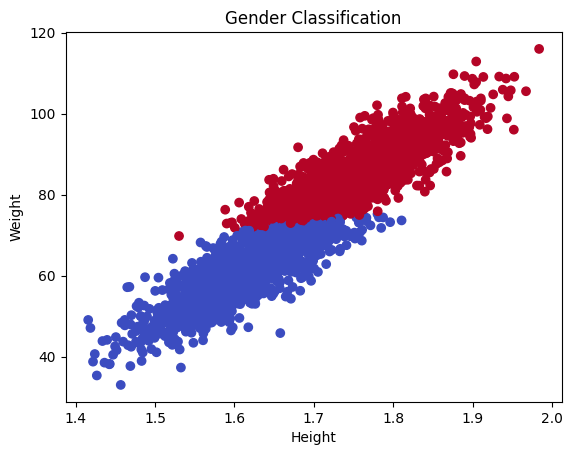

In [64]:
# Create scatter plot of height and weight, color-coded by predicted gender
plt.scatter(X_test['Height'], X_test['Weight'], c=y_pred, cmap='coolwarm')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Gender Classification')
plt.show()